### Mario Arteche Miranda
#### Programación en Python: Práctica 1.

In [116]:
import pandas as pd # cargamos pandas
import numpy as np # cargamos numpy

# Peso de los luchadores

In [122]:
data_luchadores = pd.read_csv('./data/details.csv',sep=',') # Elaboramos un data frame llamado data_luchadores con el csv details.

En el dataframe luchadores se encuentran los datos asociados a los participantes en combates. En particular recoje el peso de los participantes expresado en libras.

a) ¿Cuántos valores NAN hay en la columna Weight?

In [123]:
NAN_luchadores=data_luchadores.Weight.isnull() # objeto con los valores nulos
sum(NAN_luchadores) #suma de valores nulos

75

b) Modifica el DataFrame luchadores. Sustituye los valores NaN de la variable Weight por el valor 0 lbs..

In [124]:
data_luchadores.Weight = data_luchadores.Weight.fillna('0 lbs.') #cambiamos na por 0 lbs, con el comando fillna

c) Modifica el DataFrame luchadores. Crea una nueva columna llamada Weight gr que represente el peso del luchador en gramos. (1 libra son 453.59 gramos).

In [125]:
data_luchadores.Weight = data_luchadores.Weight.str.split(' ') #  dividimos los valores de Weight, en este caso por el espacio, que es como aparecen separados en la columna

data_luchadores['Weight gr'] = data_luchadores.Weight.str[0].astype(int) # Creamos una la nueva columna con la posicion 1ª de Weight y lo
                                                               # transformamos a numero entero (int) para poder multiplicarlo

In [127]:
def pesogr(pesolbs):
    return pesolbs * 453.59 # Creamos una funcion que va a multiplicar cada numero por 453.59

data_luchadores['Weight gr'] = data_luchadores['Weight gr'].map(pesogr) # Aplicamos la funcion creada a nuestra nueva columna gracias a map
data_luchadores.head(6) # Cargamos las primeras posiciones del dataframe para ver que se ha realizado el cambio

,fighter_name,Weight,Height,Weight gr
0,AJ Fonseca,"[145, lbs.]","5' 4""",65770.55
1,AJ Matthews,"[185, lbs.]","5' 11""",83914.15
2,AJ McKee,"[145, lbs.]","5' 10""",65770.55
3,AJ Siscoe,"[135, lbs.]","5' 7""",61234.65
4,Aalon Cruz,"[145, lbs.]","6' 0""",65770.55
5,Aaron Brink,"[205, lbs.]","6' 3""",92985.95


d) Muestra un gráfico de frecuencias de la variable Weight gr. Discute la gráfica obtenida.

In [128]:
import numpy as np
from matplotlib import pyplot as plt

Text(0, 0.5, 'Number of figthers')

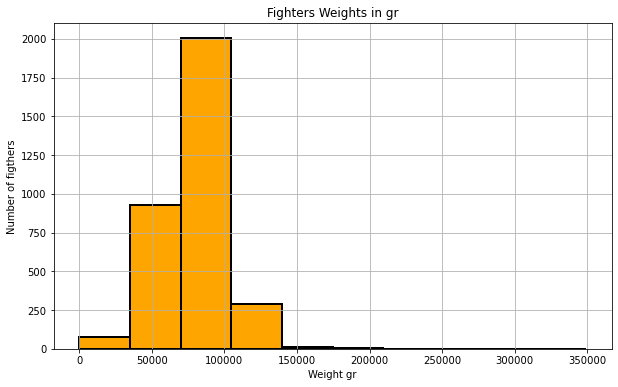

In [129]:
figura, ax1 = plt.subplots(1, figsize = (10,6))#definimos y dimensionamos el grafico
plt.title('Fighters Weights in gr')#titulamos el grafico
# Creamos un histograma para observar las frecuencias de de los datos obtenidos.                                              
data_luchadores['Weight gr'].hist(color = "orange",
                                  edgecolor = "black", 
                                  linewidth = 2)
ax1.set_xlabel('Weight gr')
ax1.set_ylabel('Number of figthers')
#observamos como la mayor parte de los datos se encuentra entre las franjas de 5000 y 100000 gramos, con un total de casi 3000 luchadores en conjunto.

# Celebración de los combates

In [130]:
import pandas as pd # cargamos pandascon la abreviatura pd como en clase
import numpy as np # cargamos numpy con la abreviatura np como en clase

In [131]:
combates = pd.read_csv('./data/dataset.csv', sep =';') # data frame que contiene la base de datos que vamos a emplear->combates


La columna location del dataframe combates recoge información del lugar donde se celebran los combates. Este campo recoge la ciudad, el estado y el país.

a) Modifica el DataFrame combates. Crear una nueva columna denominada Country con información únicamente del nombre del país.

In [132]:
combates.location = combates.location.str.split(',') # partimos location por la ,
combates['Country'] = combates.location.str[-1] # Nueva columna con nombre Country con los datos de la ultima posicion
combates.head(3) #vemos las 3 primeras filas para ver que funciona correctamente

,R_fighter,B_fighter,win_by,last_round,last_round_time,Format,Referee,date,location,Winner,weight_class,title_bout,Country
0,Henry Cejudo,Marlon Moraes,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","[Chicago, Illinois, USA]",Henry Cejudo,Bantamweight,True,USA
1,Valentina Shevchenko,Jessica Eye,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","[Chicago, Illinois, USA]",Valentina Shevchenko,Women's Flyweight,True,USA
2,Tony Ferguson,Donald Cerrone,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","[Chicago, Illinois, USA]",Tony Ferguson,Lightweight,False,USA


b) Muestra un listado de paises distintos donde se han celebrado combates.

In [133]:
combates.Country.unique() # mostramos con unique los valores unicos de los paises
#como he corregido el fallo que tenia-->vemos que hay paises con na, por que lo habiamos referenciado como el valor 2 de la serie y habria que poner el -1

array([' USA', ' Sweden', ' Brazil', ' Canada', ' Russia',
       ' United Kingdom', ' Czech Republic', ' Australia', ' China',
       ' Argentina', ' Germany', ' Singapore', ' Chile', ' Poland',
       ' Japan', ' Netherlands', ' Mexico', ' New Zealand', ' Croatia',
       ' South Korea', ' Ireland', ' Philippines',
       ' United Arab Emirates', ' Puerto Rico'], dtype=object)

c) Calcula el número de combates celebrados por fecha y país.

In [134]:
combates_pais_fecha=combates.groupby(['date','Country']) # data frame que agrupa por fecha y pais
combates_pais_fecha.date.count() #cuenta de los valores por fecha y pais utilizando el data frame que hemos creado anteriormenmte

date                Country        
April 01, 2009       USA               11
April 02, 2004       USA                8
April 02, 2008       USA               12
April 04, 2015       USA               10
April 05, 2007       USA                9
                                       ..
September 26, 2015   Japan             10
September 27, 2002   USA                8
September 27, 2014   USA               11
September 28, 2001   USA                8
September 29, 2012   United Kingdom    11
Name: date, Length: 481, dtype: int64

## IMPORTANTE:EXPERIMENTO CON PIVOT_TABLE
### ME FALTA AVERIGUAR COMO INCORPORAR EL ELEMENTO VALOR

## Calzoncillo rojo

Deseamos conocer en cuántos combates ha sido victorioso el luchador de calzoncillo rojo.

In [135]:
luchador_rojo=(combates.R_fighter == combates.Winner) # condicion (booleano) por la cual el luchador rojo debe ser ganador
luchador_rojo #vemos que lo ejecuta como queriamos

0        True
1        True
2        True
3       False
4       False
        ...  
5139     True
5140     True
5141     True
5142     True
5143     True
Length: 5144, dtype: bool

In [138]:
sum(luchador_rojo) #suma de las veces que se cumple esa condicion

3470

In [139]:
#creamos una columna con el año unicamente para ser mas agiles
combates.año = combates.date.str.split(',')
combates['Year'] = combates.año.str[1]
combates.head(2)

,R_fighter,B_fighter,win_by,last_round,last_round_time,Format,Referee,date,location,Winner,weight_class,title_bout,Country,Year
0,Henry Cejudo,Marlon Moraes,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","[Chicago, Illinois, USA]",Henry Cejudo,Bantamweight,True,USA,2019
1,Valentina Shevchenko,Jessica Eye,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","[Chicago, Illinois, USA]",Valentina Shevchenko,Women's Flyweight,True,USA,2019


## Ganadores !

a) Genera un listado de luchadores que hayan ganado por KO/TKO en más de 8 combates.

In [140]:
combates['KO'] = combates.Winner[combates['win_by'] == 'KO/TKO'] #columna que contiene a los ganadores por KO/TKO
cuenta_ko = combates.KO.value_counts() #parametro que cuenta los combates ganados por KO
cuenta_ko[cuenta_ko>8] #condicion que debe cumplir, en este caso >8

Thiago Santos        11
Anderson Silva       11
Vitor Belfort        11
Anthony Johnson      11
Junior Dos Santos    10
Michael Bisping      10
Cain Velasquez       10
Donald Cerrone       10
Matt Brown           10
Derrick Lewis        10
Andrei Arlovski       9
Chuck Liddell         9
Name: KO, dtype: int64

In [141]:
combates.head(1) #vemos como la columna KO se ha añadido correctamente

,R_fighter,B_fighter,win_by,last_round,last_round_time,Format,Referee,date,location,Winner,weight_class,title_bout,Country,Year,KO
0,Henry Cejudo,Marlon Moraes,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","[Chicago, Illinois, USA]",Henry Cejudo,Bantamweight,True,USA,2019,Henry Cejudo


b) (Opcional) Genera un gráfico que muestre el número de combates ganado por KO/TKO por cada uno de los países. Discute el resultado obtenido.

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'COUNTRY')

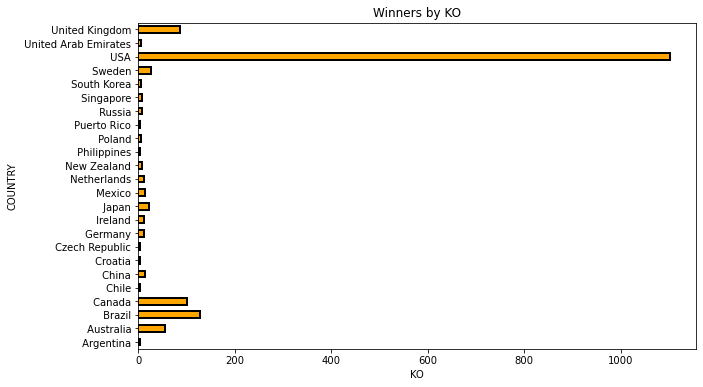

In [143]:
figura, ax1 = plt.subplots(1, figsize = (10,6)) #dimensiones del grafico
combates.groupby(['Country']).KO.count().plot(kind = 'barh', #lo representamos en un grafico de barras horizontales
                                              title='Winners by KO', #titulo principal del grafico
                                              color = "orange", #relleno de las columnas
                                              edgecolor = "black", #border de las columnas
                                              linewidth = 2) #anchura del borde
ax1.set_xlabel('KO') #titulo eje x
ax1.set_ylabel('COUNTRY') #titulo eje y

## Análisis Categoría

a) Muestra un listado ordenado por número de combates para cada categoría

In [144]:
combates_categoria = combates.groupby(['weight_class']).date.count() #agrupamos por tipo de peso de los luchadores
combates_categoria.sort_values(ascending = False)#los ordenamos de manera descendente

weight_class
Lightweight              989
Welterweight             969
Middleweight             725
Heavyweight              507
Light Heavyweight        502
Featherweight            442
Bantamweight             379
Flyweight                187
Women's Strawweight      143
Women's Bantamweight     111
Open Weight               92
Women's Flyweight         50
Catch Weight              38
Women's Featherweight     10
Name: date, dtype: int64

b) (Opcional) Muestra gráficamente el número de combates por categoría. Discute los resultados obtenidos.

Text(0, 0.5, 'Category')

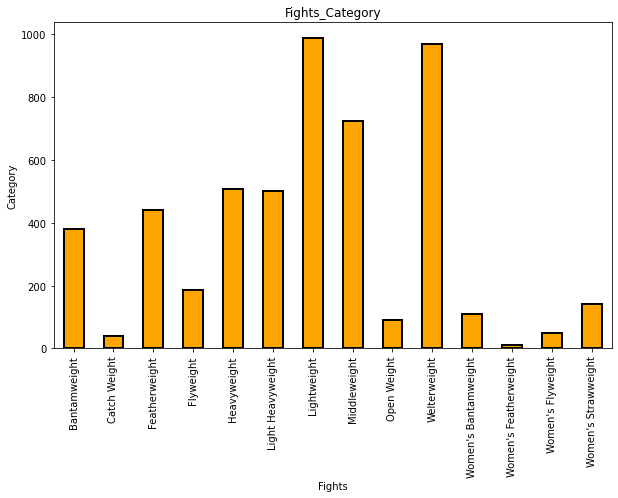

In [145]:
figura, ax1 = plt.subplots(1, figsize = (10,6)) #los mismos comentarios que en el grafico anterior
combates.groupby(['weight_class']).date.count().plot(kind = 'bar',
                                              title='Fights_Category',
                                              color = "orange", 
                                              edgecolor = "black", 
                                              linewidth = 2)
ax1.set_xlabel('Category')
ax1.set_ylabel('Fights')

## Luchadores con mas victorias

Nos interesa conocer el luchador que ha participado en más combates. Ten en cuenta que cada luchador puede participar con calzoncillo Rojo(R) o Azul(B).

In [146]:
luchador_combates = pd.concat ([combates.R_fighter, #concatenamos ambas columnas y disponemos de todos los datos en una sola
                                combates.B_fighter])
cuenta_peleas=luchador_combates.value_counts()
cuenta_peleas[cuenta_peleas>31] #condicion 

Donald Cerrone    32
Jim Miller        32
dtype: int64

## Completar

Nos interesa construir un dataframe que reuna la información de los combates y los pesos de cada uno de los luchadores. Para ello, añade las columnas R_weigth y B_weigth al dataframe de combates. R_weigth representa el peso del luchador rojo y B_weigth representa el peso del jugador azul.

## Top Luchadores

a) Listado de luchadores (sin repetición) que hayan particidado en más de 17 combates en la categoría Lightweight.

In [147]:
light_weight = combates[combates['weight_class'] == 'Lightweight'] #solo aquellos lightweight
luchador_light=pd.concat([light_weight.R_fighter, #concatenamos en una columna
                         light_weight.B_fighter])
cuenta_Peleas=luchador_light.value_counts(ascending = False)
cuenta_Peleas[cuenta_Peleas>17] #condicion

Jim Miller          31
Gleison Tibau       27
Joe Lauzon          26
Ross Pearson        23
Donald Cerrone      22
Rafael Dos Anjos    21
Edson Barboza       21
Clay Guida          20
Melvin Guillard     20
Evan Dunham         20
Yves Edwards        20
Sam Stout           19
dtype: int64

b) Listado de luchadores que han ganado combates y han conseguido el titulo (title bout)

In [148]:
luchadores_ganadores_titulo = combates[combates['title_bout'] == True].Winner
luchadores_ganadores_titulo.head(5)

0             Henry Cejudo
1     Valentina Shevchenko
38         Jessica Andrade
86          Dustin Poirier
87         Israel Adesanya
Name: Winner, dtype: object

## Años

Muestra los datos de los combates ordenados por año y país de forma descendente.

In [149]:
combates.head(2)#para ver que columnas disponemos y poder actuar correctamente

,R_fighter,B_fighter,win_by,last_round,last_round_time,Format,Referee,date,location,Winner,weight_class,title_bout,Country,Year,KO
0,Henry Cejudo,Marlon Moraes,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","[Chicago, Illinois, USA]",Henry Cejudo,Bantamweight,True,USA,2019,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","[Chicago, Illinois, USA]",Valentina Shevchenko,Women's Flyweight,True,USA,2019,Valentina Shevchenko


In [150]:
#como ya habiamos creado previamente las columnas año y pais , solo queda ordenar de forma descendente por ellas
order_year_country = combates.sort_values(by=['Year','Country'], ascending = False)
order_year_country.head(5)

,R_fighter,B_fighter,win_by,last_round,last_round_time,Format,Referee,date,location,Winner,weight_class,title_bout,Country,Year,KO
124,Darren Till,Jorge Masvidal,KO/TKO,2,3:05,5 Rnd (5-5-5-5-5),Marc Goddard,"March 16, 2019","[London, England, United Kingdom]",Jorge Masvidal,Welterweight,False,United Kingdom,2019,Jorge Masvidal
125,Leon Edwards,Gunnar Nelson,Decision - Split,3,5:00,3 Rnd (5-5-5),Kevin Sataki,"March 16, 2019","[London, England, United Kingdom]",Leon Edwards,Welterweight,False,United Kingdom,2019,NaN
126,Volkan Oezdemir,Dominick Reyes,Decision - Split,3,5:00,3 Rnd (5-5-5),Leon Roberts,"March 16, 2019","[London, England, United Kingdom]",Dominick Reyes,Light Heavyweight,False,United Kingdom,2019,NaN
127,Nathaniel Wood,Jose Quinonez,Submission,2,2:46,3 Rnd (5-5-5),Rich Mitchell,"March 16, 2019","[London, England, United Kingdom]",Nathaniel Wood,Bantamweight,False,United Kingdom,2019,NaN
128,Danny Roberts,Claudio Silva,Submission,3,2:37,3 Rnd (5-5-5),Kevin Sataki,"March 16, 2019","[London, England, United Kingdom]",Claudio Silva,Welterweight,False,United Kingdom,2019,NaN


## Formato de los combates

Averigüa cuáles son los diferentes formatos de combates y el número de combates celebrados para cada formato.

In [151]:
tipo_combates=combates.Format.unique()
tipo_combates

array(['5 Rnd (5-5-5-5-5)', '3 Rnd (5-5-5)', '3 Rnd + OT (5-5-5-5)',
       '2 Rnd (5-5)', '1 Rnd + 2OT (15-3-3)', '1 Rnd + OT (12-3)',
       '1 Rnd (12)', '1 Rnd + OT (15-3)', '1 Rnd (15)',
       '1 Rnd + 2OT (24-3-3)', '1 Rnd (10)', '1 Rnd + OT (27-3)',
       '1 Rnd (18)', '1 Rnd + OT (30-5)', '1 Rnd + OT (30-3)',
       '1 Rnd (20)', '1 Rnd (30)', '1 Rnd + OT (31-5)', 'No Time Limit'],
      dtype=object)

In [152]:
combates.head()
#para ver como vamos a agruparlos

,R_fighter,B_fighter,win_by,last_round,last_round_time,Format,Referee,date,location,Winner,weight_class,title_bout,Country,Year,KO
0,Henry Cejudo,Marlon Moraes,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","[Chicago, Illinois, USA]",Henry Cejudo,Bantamweight,True,USA,2019,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","[Chicago, Illinois, USA]",Valentina Shevchenko,Women's Flyweight,True,USA,2019,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","[Chicago, Illinois, USA]",Tony Ferguson,Lightweight,False,USA,2019,NaN
3,Jimmie Rivera,Petr Yan,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","[Chicago, Illinois, USA]",Petr Yan,Bantamweight,False,USA,2019,NaN
4,Tai Tuivasa,Blagoy Ivanov,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","[Chicago, Illinois, USA]",Blagoy Ivanov,Heavyweight,False,USA,2019,NaN


In [153]:
combates.rename(columns={'Country':'Value_Counts'}, inplace = True)
#cambiamos el valor de la columna country por Value_Counts, y de esta manera obtener la pivot como queremos

In [154]:
pivot = combates.pivot_table(index=['Format'], 
                     values=['Value_Counts'],
                     aggfunc='count',
                     margins=True)
pivot #pivot table que agrupa por tipo de combate y numero de combates que ha habido en cada uno de los tipos

,Value_Counts
Format,
1 Rnd (10),6
1 Rnd (12),4
1 Rnd (15),8
1 Rnd (18),2
1 Rnd (20),20
1 Rnd (30),1
1 Rnd + 2OT (15-3-3),20
1 Rnd + 2OT (24-3-3),1
1 Rnd + OT (12-3),79


In [155]:
#volvemos a poner el nombre original a Country para evitar confusiones futuras en caso de hacer mas consultas
combates.rename(columns={'Value_Counts':'Country'}, inplace = True)
combates.head(2)#vemos que se aplica correctamente

,R_fighter,B_fighter,win_by,last_round,last_round_time,Format,Referee,date,location,Winner,weight_class,title_bout,Country,Year,KO
0,Henry Cejudo,Marlon Moraes,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","[Chicago, Illinois, USA]",Henry Cejudo,Bantamweight,True,USA,2019,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","[Chicago, Illinois, USA]",Valentina Shevchenko,Women's Flyweight,True,USA,2019,Valentina Shevchenko
